# WeatherPy
----

In [52]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import csv
from scipy.stats import linregress
from pprint import pprint 

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [53]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []
np.random.seed(123) #this sets fix/same number 
# Create a set of random lat and lng combinations

lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

598

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [69]:
base_url = f"http://api.openweathermap.org/data/2.5/weather?APPID={weather_api_key}&units=imperial&q="

data_df = pd.DataFrame(columns = ["City", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed", "Country", ])

print("Beginning Data Retrieval")     
print("-----------------------------")

i = 1

for city in cities:
    print(f"processing city {i} | {city}")
    
    try: 
        response_json = requests.get(base_url + city).json()
        city_name = response_json["name"]
        lat = response_json["coord"]["lat"]
        long = response_json["coord"]["lon"]
        max_temp = response_json["main"]["temp_max"]
        hum = response_json["main"]["humidity"]
        cloud = response_json["clouds"]["all"]
        wind_speed = response_json["wind"]["speed"]
        country = response_json["sys"]["country"]
        
        data_df = data_df.append({"City":city_name, 
                                  "Lat": lat, 
                                  "Lng": long, 
                                  "Max Temp":max_temp, 
                                  "Humidity": hum,
                                  "Cloudiness": cloud, 
                                  "Wind Speed": wind_speed, 
                                  "Country":country,}, ignore_index = True)
    except:
        print("City not found. Skipping...")
        pass
    i += 1
    
data_df    



Beginning Data Retrieval
-----------------------------
processing city 1 | camacha
processing city 2 | mataura
processing city 3 | hobart
processing city 4 | bargal
City not found. Skipping...
processing city 5 | manacor
processing city 6 | sao jose da coroa grande
processing city 7 | barrow
processing city 8 | levelland
processing city 9 | ambon
processing city 10 | morondava
processing city 11 | rikitea
processing city 12 | ogden
processing city 13 | alta floresta
processing city 14 | port alfred
processing city 15 | ongandjera
processing city 16 | bastia
processing city 17 | new norfolk
processing city 18 | mabay
processing city 19 | ugoofaaru
processing city 20 | ponta do sol
processing city 21 | attawapiskat
City not found. Skipping...
processing city 22 | severo-kurilsk
processing city 23 | kapaa
processing city 24 | horasan
processing city 25 | esperance
processing city 26 | taltal
processing city 27 | dunedin
processing city 28 | victor harbor
processing city 29 | eldorado
proc

City not found. Skipping...
processing city 247 | los llanos de aridane
processing city 248 | grand gaube
processing city 249 | umzimvubu
City not found. Skipping...
processing city 250 | kaitangata
processing city 251 | mackay
processing city 252 | chotila
processing city 253 | lata
processing city 254 | svetlogorsk
processing city 255 | inuvik
processing city 256 | palmer
processing city 257 | adolfo lopez mateos
processing city 258 | nantucket
processing city 259 | tocopilla
processing city 260 | raga
processing city 261 | nuevo laredo
processing city 262 | comodoro rivadavia
processing city 263 | castlegar
processing city 264 | hirara
processing city 265 | ampanihy
processing city 266 | mina
processing city 267 | geylegphug
City not found. Skipping...
processing city 268 | eureka
processing city 269 | tandil
processing city 270 | aripuana
processing city 271 | grindavik
processing city 272 | digras
processing city 273 | karaul
City not found. Skipping...
processing city 274 | conce

processing city 496 | korla
processing city 497 | karratha
processing city 498 | nsanje
processing city 499 | najran
processing city 500 | daxian
City not found. Skipping...
processing city 501 | davila
processing city 502 | stornoway
processing city 503 | kalemie
processing city 504 | xinzhou
processing city 505 | touros
processing city 506 | yerkoy
processing city 507 | yuzhno-yeniseyskiy
City not found. Skipping...
processing city 508 | karistos
City not found. Skipping...
processing city 509 | olbia
processing city 510 | chillicothe
processing city 511 | chupa
processing city 512 | sibolga
processing city 513 | abbeville
processing city 514 | mahon
processing city 515 | troitsko-pechorsk
processing city 516 | puerto leguizamo
processing city 517 | kondinskoye
processing city 518 | pisco
processing city 519 | bur gabo
City not found. Skipping...
processing city 520 | menomonie
processing city 521 | coihaique
processing city 522 | banda aceh
processing city 523 | lahad datu
processin

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country
0,Camacha,33.08,-16.33,68,88,75,13.87,PT
1,Mataura,-46.19,168.86,42.75,93,100,6.22,NZ
2,Hobart,-42.88,147.33,44.6,81,20,5.82,AU
3,Manacor,39.57,3.21,73.4,94,0,3.36,ES
4,São José da Coroa Grande,-8.90,-35.15,75.6,81,2,6.60,BR
...,...,...,...,...,...,...,...,...
545,Makakilo City,21.35,-158.09,84.2,66,1,12.75,US
546,Adré,13.47,22.20,81.9,50,100,2.21,TD
547,Abasolo,20.45,-101.52,75.2,57,75,5.82,MX
548,Lake City,30.19,-82.64,89.6,55,40,11.41,US


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [74]:
with open(output_data_file, "w", encoding = "utf-8", newline = "\n") as csvfile:
     data_df.to_csv(csvfile, index=False)
csvfile.close()


In [75]:
with open(output_data_file, "r", encoding="utf-8") as read_file:
    data_df = pd.read_csv(read_file, na_filter=False)

In [76]:
data_df.count()

City          550
Lat           550
Lng           550
Max Temp      550
Humidity      550
Cloudiness    550
Wind Speed    550
Country       550
dtype: int64

In [77]:
data_df.head()


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country
0,Camacha,33.08,-16.33,68.00,88,75,13.87,PT
1,Mataura,-46.19,168.86,42.75,93,100,6.22,NZ
2,Hobart,-42.88,147.33,44.60,81,20,5.82,AU
3,Manacor,39.57,3.21,73.40,94,0,3.36,ES
4,São José da Coroa Grande,-8.90,-35.15,75.60,81,2,6.60,BR


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [78]:
humid = data_df.loc[data_df['Humidity']>100]
len(humid)


0

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

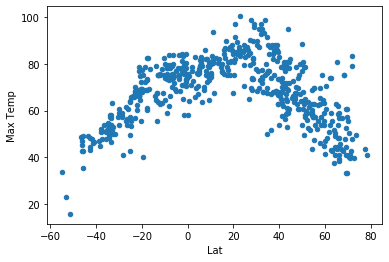

In [79]:
data_df.plot(kind="scatter", x = "Lat", y= "Max Temp")

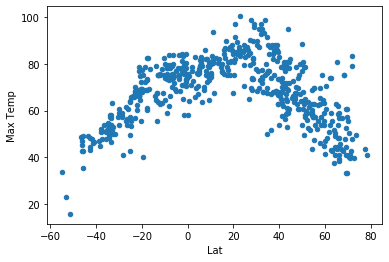

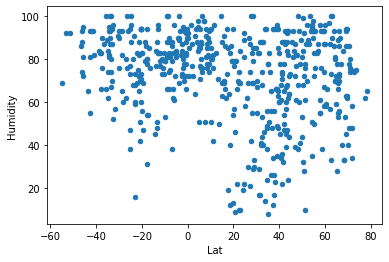

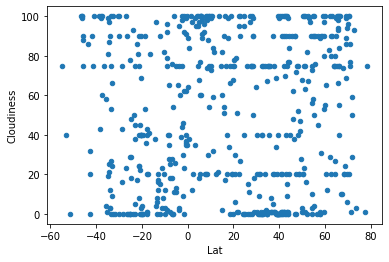

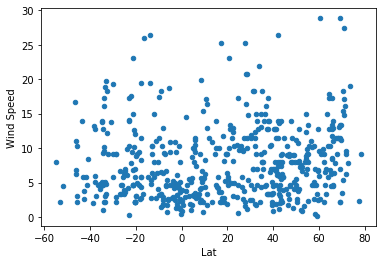

In [80]:
#a function that looks through all 4 keys 
def maps():
    list = ["Max Temp", "Humidity","Cloudiness", "Wind Speed" ]
    for value in list:
        data_df.plot(kind="scatter", x = "Lat", y = value)

maps()

## Linear Regression

In [81]:
# OPTIONAL: Create a function to create Linear Regression plots

def lr():
    slope, intercept, r_value, p_value, std_err = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x, y)
    plt.plot(x, regress_values, 'r-')
    plt.annotate(line_eq, (0,0.2), xycoords='axes fraction', fontsize = 12, color='red')
    plt.xlabel('Lat')
    plt.ylabel(y_label)
    print(f"The r-squared is: {r_value**2}")
    plt.show()  



In [82]:
# Create Northern and Southern Hemisphere DataFrames

NorthHemi = data_df.loc[data_df["Lat"] > 0]
SouthHemi = data_df.loc[data_df["Lat"] < 0]


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.4428368413159579


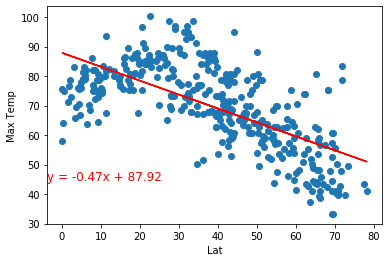

In [83]:
x = NorthHemi["Lat"]
y = NorthHemi["Max Temp"]
y_label = "Max Temp"

lr()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.7196183706147466


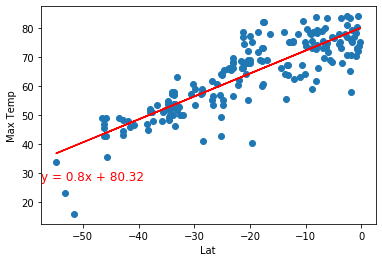

In [84]:
x = SouthHemi["Lat"]
y = SouthHemi["Max Temp"]
y_label = "Max Temp"

lr()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.0024559048837864477


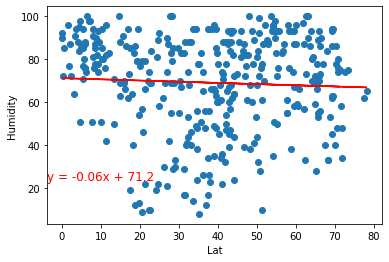

In [85]:
x = NorthHemi["Lat"]
y = NorthHemi["Humidity"]
y_label = "Humidity"

lr()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.0021487795233491704


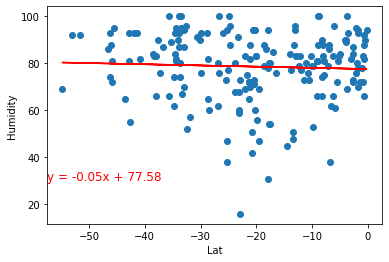

In [86]:
x = SouthHemi["Lat"]
y = SouthHemi["Humidity"]
y_label = "Humidity"

lr()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.0018118311183046183


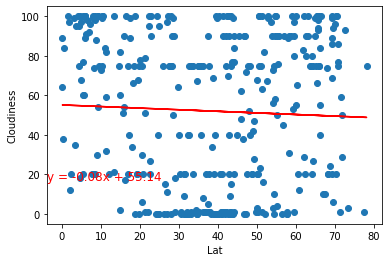

In [87]:
x = NorthHemi["Lat"]
y = NorthHemi["Cloudiness"]
y_label = "Cloudiness"

lr()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.02618955196505836


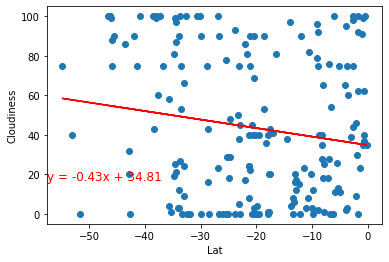

In [88]:
x = SouthHemi["Lat"]
y = SouthHemi["Cloudiness"]
y_label = "Cloudiness"

lr()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.02882283396286125


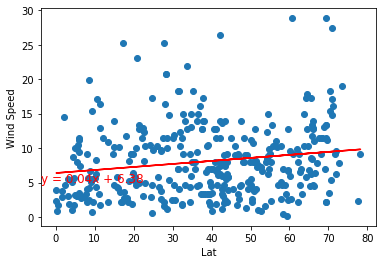

In [89]:
x = NorthHemi["Lat"]
y = NorthHemi["Wind Speed"]
y_label = "Wind Speed"

lr()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.019053958978181143


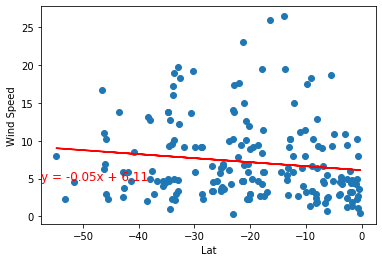

In [90]:
x = SouthHemi["Lat"]
y = SouthHemi["Wind Speed"]
y_label = "Wind Speed"

lr()